# Agenda:
1. Learn about sklearn package
2. Learn what is ML
3. Learn types of ML
4. Where does Supervised Learning Apply

### What is ML?

#### -> To enable the computer to take decisions from data. (WITHOUT BEING EXPLICITLY PROGRAMMED FOR THE TASK).

### Examples of ML:
    PREDICT weather a message is Spam or Not (Based on sender and content)
    CLUSTER the wikipedia entries into topics (Based on the words they contain)
    
#### The first task of prediction involves lables data - (SPAM/HAM) 
#### - These kind of learning algorithms are called as supervised learning

#### The second task has no idea of its labels - (Cluster 1/Cluster 2 etc)
#### - These kind of tasks are called as unsupervised learning

### Unsupervised Learning

So we try to find patterns in unlabeled data.
like categorizing customers based on their buying pattern.

(But we have no idea what these categories might be).
We will just know that this is category 1 or Cat 2 etc.

These kind of learning/algs are called as Clustering which are a type of Unsupervised learning.

### Reinforcement Learning

Here machines/codes are made to interact with an environment
where these machines/codes will be able to automatically figure out
how to modify their behaviour.

This works with a principle of rewards and punishments.

This is like a case of behavioural psychology.

Economics/Genetics and Game playing.

Like a chess machine which learns from its mistake and somehow makes itself stronger over a player.

### Supervised Learning

Basically it just consists of various features and a target variable that we try to predict.

and most importantly do think of it as a excel table with a few empty cells for one of the columns 
which needs to be figured out by a complex logic involving data from the other columns.

If the target variable in our experiment consists of classes -> spam/Ham or positive/negative/neutral or colors
etc we call that as a classification problem.

If the target is a continous variable - a value then its called as a regression problem.

#### What are we going to do with a supervised learning

We could help in automating time-consuming and manual tasks.
1. diagnostics on ailments
2. Will a ad be clicked
3. Is the message spam
4. What kind of tone a message has
5. What kind of a sms we have
etc

We are going to use a library called Sklearn (Scikit-learn) in python to perform machine learning tasks.
later on we are gonna do the same with tensorflow and keras

In [ ]:
# Now lets do a small exercise on the Iris dataset classification

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris_ds = datasets.load_iris()

In [4]:
type(iris_ds)

sklearn.utils.Bunch

In [5]:
print(iris_ds.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
iris_ds.data.shape

(150, 4)

In [ ]:
# 150 samples and 4 features are given

In [9]:
x = iris_ds.data
y = iris_ds.target
df = pd.DataFrame(x,columns = iris_ds.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


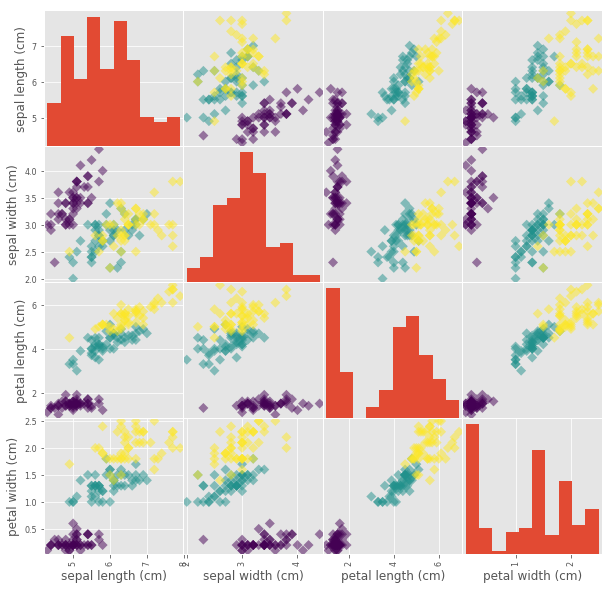

In [17]:
_ = pd.scatter_matrix(df, c = y, figsize = [10,10], s = 50, marker = 'D')

## Predict the label of the given data using a classifier

- for now we are gonna use the K-Nearest Neighbour (KNN) as a classifier.

- that is find the label of the given data by looking at the K nearest neighbour (k=3 then 3 nearest data)

- and then take a majority vote.

- basically we try to build a decision boundary.

- all ML models in python are built as classes with two major functions : 

- FIT (Train)
- PREDICT (Test)

- Store the information learned from the data and this information will be called as the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

In [22]:
knn.fit(iris_ds['data'],iris_ds['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [1]:
prediction = knn.predict(<unlabeled data>)
print(predictions)

SyntaxError: invalid syntax (<ipython-input-1-1afd7393ba34>, line 1)

### Now we need to learn about how to measure the model performance

Usually in classification problems accuracy is one of the commonly used metric

accuracy = number of correct predictions / Total number of predictions made (90 correct ones out of 100 predicted)

but hey which data should we use for this accuracy check.

The one that we used for training?
or the one that we used for training + testing?

NO

Split the data into test and train sets
and train it using training data
and get accuracy on the test data. (Remember test data is also labeled and was part of the data we had labeled)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(x, y, test_size = 0.3,
                    random_state = 21, stratify = y)
    
# important here is the Stratify argument as it uses the same ratio of different values of target variables present 
# in the entire data to the train and test.

# in layman terms
# Original data had 50 Apples, 50 Oranges and 25 Bananas
# Training data will have 40 Apples, 40 Oranges and 20 Bananas
# Testing data will have 10 Apples. 10 Oranges and 5 Bananas

knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train,Y_train)

y_pred = knn.predict(X_test)

knn.score(X_test,Y_test)


0.9555555555555556

### Lets discuss the Model Complexity

 We know that we can evaluate a model on accuracy - good
 now as we change the models hyperparameters for example K in KNN
 we would end up having different results
 for example 
 
 - as we increase K the decision boundary becomes smoother and yields a less complex model
 - for low value of K the decision boudary will try to accomodate even the noises in data and thus the model becomes more complex.

 #### Thus Overfitting happens if the model is more complex
 #### (Laymans Terms)-instead of picking general trends it starts to even pick up noises.

 #### Thus Underfitting happens if the model is too simple
 #### (Laymans Terms)-the model misses out the near boundary data and starts misclassifying them

<img src="ofitufit.png">

Thus the best playground or sweetspot is somewhere in between this overfitting and underfitting
which we can learn from the model complexity curve
viz 
#### a accuracy plot over different values of a hyperparameter in question

<img src="sweetspot.png">


# OFF TO REGRESSION TASKS

### Regression is prediction of a continuous value rather than a classification to a label.

In [4]:
# Now lets perform a regression task where we have to predict a continuous value instead of a label

from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
x = boston['data']
y = boston['target']

In [37]:
type(boston['data'])

numpy.ndarray

In [43]:
x_rooms = x[:,5]

In [44]:
x_rooms.shape

(506,)

In [45]:
x_rooms = x_rooms.reshape(-1,1)

In [46]:
x_rooms.shape

(506, 1)

In [8]:
y = y.reshape(-1, 1)

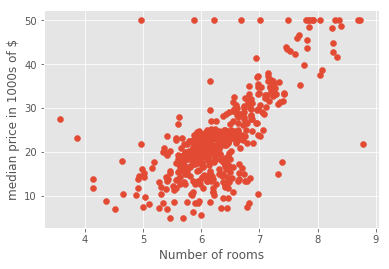

In [49]:
plt.scatter(x_rooms, y)
plt.xlabel('Number of rooms')
plt.ylabel('median price in 1000s of $')
plt.show()

In [51]:
# Now lets predict

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
prediction_space = np.linspace(min(x_rooms),max(x_rooms)).reshape(-1, 1)

In [53]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

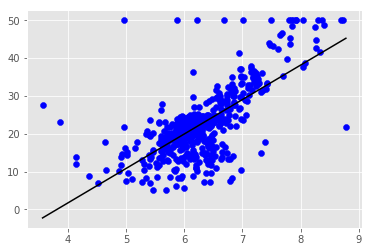

In [54]:
plt.scatter(x_rooms,y, color = 'blue')
plt.plot(prediction_space,reg.predict(prediction_space), color = 'black')
plt.show()

### So how does linear regression work

 we try to fit a line in a data
 in 2D a line is of the form y = mx + c
 so we only need to figure out m and c 
 which in other words are the parameters we need to learn
 here it is worthwhile to note x is just a single variable (predictor)

 the question of training is fitting the values of m and c


 One common method is to define a error function and then
 choose the line that ends up minimizing that error function
 this is also called as lost function

<img src="residuals.png">

- Now this residuals are the errors

- We can't just minimize the sum of residuals as it has polarity

- so we can either reduce the absolute sum of residuals |sum(res)|

- or we can reduce the sum of squares of residuals sum((res)^2) - Ordinary least squares

- all the fit function in sklearn performs OLS

- to explicitly perform something like RMSE

from sklearn.metrics import mean_squared_error

use -> np.sqrt(mean_squared_error(y_test,y_pred)

### Linear regression in higher dimentions

when we have one more variable to consider for the output the line equation becomes

y = mx<sub>1</sub> + nx<sub>2</sub> + c

so

the general eq is

y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + a<sub>3</sub>x<sub>3</sub> + ... a<sub>n</sub>x<sub>n</sub> + c


sklearn uses the same thing in its ft method

well do the boston housing on multiple variables now

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.3, random_state = 24)
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

## Now what can we use for the model performance

So accuracy is always in the shelf

but the default performance metic for linear regression is something called as - R-Square

This R<sup>2</sup> - quantifies the variance in the target variable due to the predictor variable.

so that is also implemented in the score() function of the modeller variable

In [59]:
reg.score(X_test, Y_test)

0.7133431144123457

### Ok what happened 71 seems bit low

-> the reason for that is because we have not done regularization

-> We never use linear regression like we did above we always regularize the variables before applying regression

-> we call em regularized linear models.


### Before we proceed any further there is one pitfall

-> the model is not generalizing to entire data

-> it only does to the train data

-> test data is not well generalized

-> what if we miss something important in test

-> so we perform
#### K-Fold CV

how to do that is given below



In [60]:
from sklearn.model_selection import cross_val_score
reg_scores = cross_val_score(reg, x, y, cv = 5)

In [61]:
reg_scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

Cross validation is essential but do not forget that the more folds you use, 
the more computationally expensive cross-validation becomes

## Now back to the regularization

its simply the fact that sometimes the coefficients (THE COEFFICIENTS not the variables, be clear about it, its m and c not x)
have a tendancy to be of higher magnitude and can cause overfitting

This effect at hi D space may cause that variable with the higher coefficient to have more predictive power

therefore we need to penalize these buggers and get a proper prediction.

When it comes to regression

There are two regularized models that we use

1. Ridge model
2. Lasso model

Ridge model has the value of LOSS FUNCTION to be 
   OLS Loss + $\alpha$ * sum-over-1-to-n(a<sub>n</sub><sup>2</sup>)
   
Lasso model has the value of LOSS FUNSTION to be 
   OLS Loss + $\alpha$ * sum-over-1-to-n(|a<sub>n</sub>|)
   
   
Now $\alpha$ becomes a hyper parameter which affects the model performance

 higher $\alpha$ would mean more penalizing very high would cause UNDERFITTING
 lower $\alpha$ would mean less penalizing hence possibility of OVERFITTING
 
 
 from sklearn.linear_model import Ridge
 
 from sklearn.linear_model import Lasso
 
 
 and Lasso can be used for feature selection -> a very important job indeed


<function matplotlib.pyplot.show>

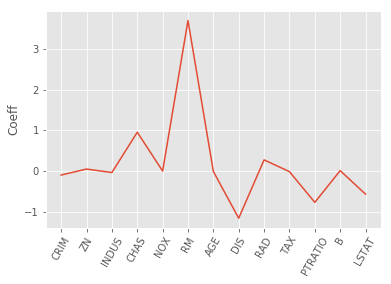

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(x,y).coef_

_ = plt.plot(range(len(boston['feature_names'])), lasso_coef)
_ = plt.xticks(range(len(boston['feature_names'])), boston['feature_names'], rotation = 60)
_ = plt.ylabel("Coeff")
plt.show

In [10]:

## Same thing but uses NORMALIZE

# Import Lasso
# Import Lasso
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(x,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()



[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]


NameError: name 'df_columns' is not defined

In [13]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x, y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


NameError: name 'display_plot' is not defined